Notlar TechproEducation Data Science egitiminden alinmistir.

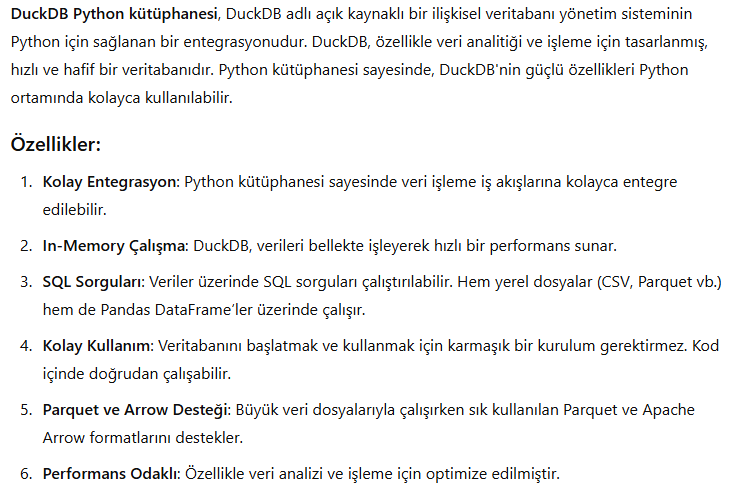

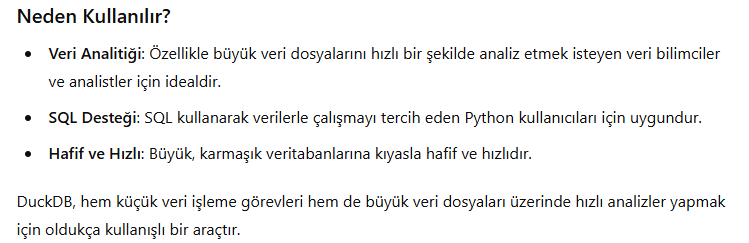

In [2]:
pip install duckdb

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------- ----------------------- 4.5/11.0 MB 26.9 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 29.2 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 27.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import duckdb

conn = duckdb.connect(':memory:')  # Bellekte bir veritabani olusturur, kalici veritabani icin bir dosya adi vermemiz gerekir.

In [ ]:
# Bir tablo olusturma

conn.execute("""
CREATE TABLE employees (
    id INTEGER,
    name VARCHAR,
    age INTEGER,
    department VARCHAR
);
""")

In [ ]:
# Veri ekleme

conn.execute("""
INSERT INTO employees VALUES
(1, 'John Doe', 30, 'IT'),
(2, 'Jane Smith', 25, 'HR'),
(3, 'Mike Brown', 35, 'Finance');
""")

In [2]:
# Bir CSV dosyasini sorgulama

conn.execute("""
CREATE TABLE otomobil AS SELECT * FROM 'OtomobilFiyatlari.tsv';
""")

In [3]:
# Bir TSV dosyasini sorgulama

result = conn.execute("""
SELECT * FROM read_csv_auto('OtomobilFiyatlari.tsv', delim='\t') LIMIT 5;
""").fetchdf()

print(result)

        marka      model                           donanim motor   yakit  \
0  Alfa Romeo         4C                           1.8 TCT  1800  Benzin   
1  Alfa Romeo  4C Spider                           1.8 TCT  1800  Benzin   
2  Alfa Romeo     Giulia   2.0 200hp SUPER RWD BENZİNLİ AT  2000  Benzin   
3  Alfa Romeo     Giulia  2.0 280hp VELOCE AWD BENZİNLİ AT  2000  Benzin   
4  Alfa Romeo     Giulia      2.9 510hp QV RWD BENZİNLİ AT  2900  Benzin   

      vites   fiyat                     websitesi  
0  Otomatik  580000  http://www.alfaromeo.com.tr/  
1  Otomatik  620000  http://www.alfaromeo.com.tr/  
2  Otomatik  320000  http://www.alfaromeo.com.tr/  
3  Otomatik  380000  http://www.alfaromeo.com.tr/  
4  Otomatik  780000  http://www.alfaromeo.com.tr/  


In [4]:
# En pahali otomobili getiren sorgu

most_expensive = conn.execute("SELECT * FROM otomobil ORDER BY fiyat DESC LIMIT 1").fetchdf()

print("En pahalı otomobil:", most_expensive)

En pahalı otomobil:       marka           model                       donanim motor   yakit  \
0  Mercedes  S 65 AMG Coupe  6.0 630BG Performance 4MATIC     6  Benzin   

      vites    fiyat                         websitesi  
0  Otomatik  2275100  http://www.mercedes-benz.com.tr/  


In [5]:
# Belirli bir markanin otomobillerini sorgulama

toyota_cars = conn.execute("SELECT * FROM otomobil WHERE marka = 'Toyota'").fetchdf()

print("Toyota araçları:", toyota_cars)

Toyota araçları:       marka  model                                  donanim motor   yakit  \
0    Toyota  Auris                                1.33 Life   1,3  Benzin   
1    Toyota  Auris                          1.4 D-4D Active   1,4   Dizel   
2    Toyota  Auris                  1.4 D-4D Active Skypack   1,4   Dizel   
3    Toyota  Auris                         1.4 D-4D Advance   1,4   Dizel   
4    Toyota  Auris                 1.4 D-4D Advance Skypack   1,4   Dizel   
..      ...    ...                                      ...   ...     ...   
111  Toyota  Yaris  1.33 Style X-Trend Skypack Multidrive S   1,3  Benzin   
112  Toyota  Yaris                          1.5 Hybrid Cool   1,5  Hibrit   
113  Toyota  Yaris                        1.5 Hybrid Spirit   1,5  Hibrit   
114  Toyota  Yaris                  1.5 Hybrid Spirit(yeni)   1,5  Hibrit   
115  Toyota  Yaris                       1.5 Hybrid X-Trend   1,5  Hibrit   

        vites   fiyat                   websitesi  
0     

In [6]:
# Ortalama fiyat hesaplama

avg_price = conn.execute("SELECT AVG(fiyat) AS avg_price FROM otomobil").fetchdf()

print("Ortalama fiyat:", avg_price)

Ortalama fiyat:        avg_price
0  242843.412965
